# Using K-means for Clustering problem in Julia
First as usual we load packages we will use

In [29]:
using Clustering, Plots, RDatasets, Random

Initialiazing plot and generating some random points

In [8]:
gr(size = (600,600))
f1 = rand(100);
f2 = rand(100);

Plot data

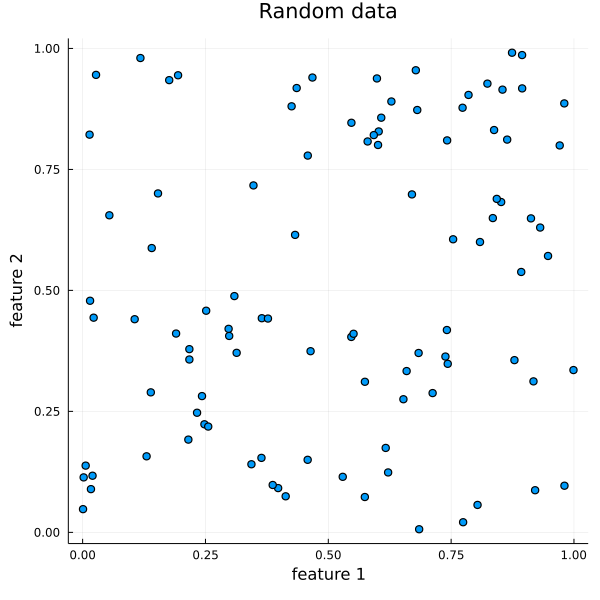

In [56]:
p_rand = scatter(f1,f2,
    xl = "feature 1",
    yl = "feature 2",
    title = "Random data",
    legend = false)

Treating the data a little

In [63]:
X = [f1 f2]'
# initialize variables
k = 5 # We want to create two clusters
itr = 100; #iterations
X

2×100 adjoint(::Matrix{Float64}) with eltype Float64:
 0.917609  0.87399   0.598996  0.85182   …  0.153411  0.59264  0.864091
 0.311996  0.991159  0.93798   0.682602     0.700383  0.82094  0.811618

Cluster data using k-means clustering algorithm

In [64]:
result = kmeans(X, k; maxiter=itr, display=:iter)
a = assignments(result)
c = counts(result)
# Centroids of the clusters
mu = result.centers 

  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       7.225132e+00
      1       4.837571e+00      -2.387561e+00 |        5
      2       4.247160e+00      -5.904111e-01 |        5
      3       3.833943e+00      -4.132165e-01 |        4
      4       3.633497e+00      -2.004468e-01 |        5
      5       3.563931e+00      -6.956517e-02 |        4
      6       3.529090e+00      -3.484168e-02 |        3
      7       3.497680e+00      -3.140983e-02 |        4
      8       3.428627e+00      -6.905272e-02 |        4
      9       3.321709e+00      -1.069183e-01 |        3
     10       3.268595e+00      -5.311376e-02 |        2
     11       3.237962e+00      -3.063282e-02 |        0
     12       3.237962e+00       0.000000e+00 |        0
K-means converged with 12 iterations (objv = 3.237962245986095)


2×5 Matrix{Float64}:
 0.251013  0.215176  0.776848  0.723033  0.23932
 0.444604  0.156821  0.799609  0.239929  0.85134

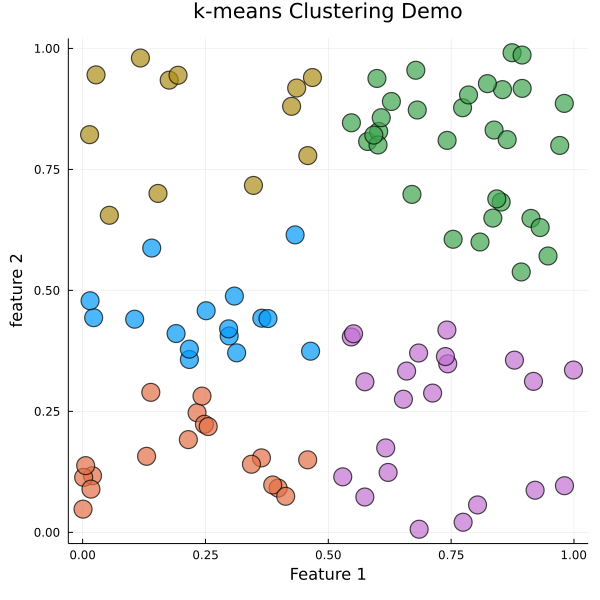

In [65]:
# plotting results
p_kmeans_demo = scatter(f1,f2,
    xl = "Feature 1",
    yl = "feature 2",
    title = "k-means Clustering Demo",
    group = a,
    ms = 10,
    alpha = 0.7,
    legend = false)

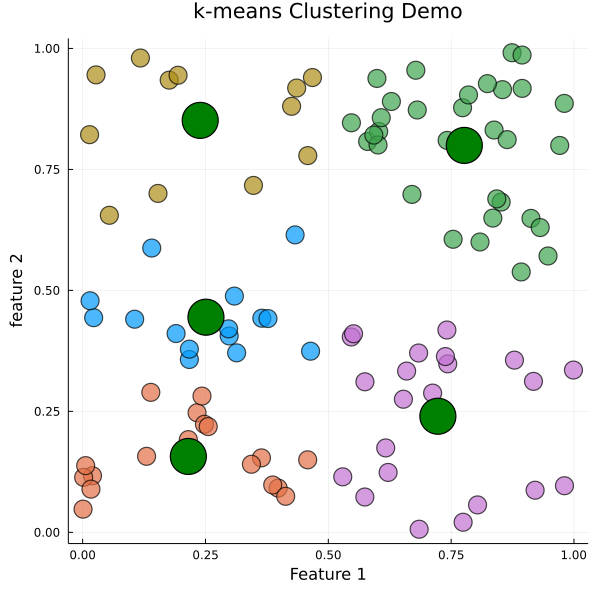

In [66]:
# Now we eant to see where are the centroids
scatter!(mu[1,:], mu[2,:],
c = :green,
ms = 20,
alpha = 7,
legend = false)

## Application of this model

In [67]:
# loading data
cats = dataset("boot", "catsM")

,Sex,BWt,HWt
,Cat…,Float64,Float64
1,M,2.0,6.5
2,M,2.0,6.5
3,M,2.1,10.1
4,M,2.2,7.2
5,M,2.2,7.6
6,M,2.2,7.9
7,M,2.2,8.5
8,M,2.2,9.1
9,M,2.2,9.6


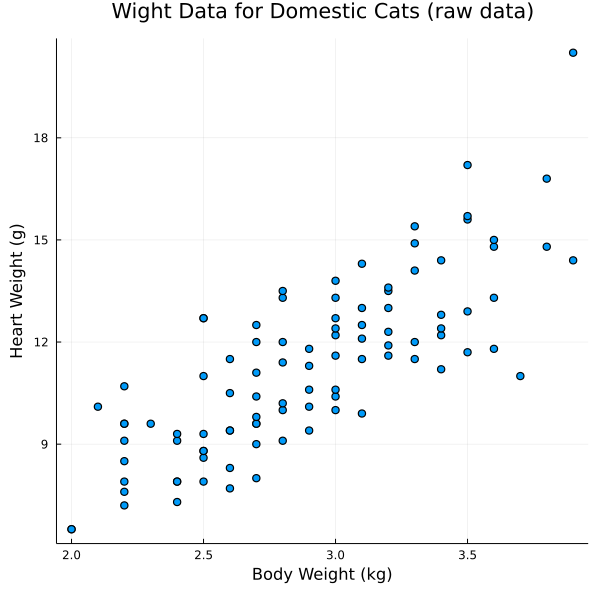

In [70]:
# Plotting data 
p_cats = scatter(cats.BWt,cats.HWt,
    xl = "Body Weight (kg)",
    yl = "Heart Weight (g)",
    title = "Wight Data for Domestic Cats (raw data)",
    legend = false
    )

In [105]:
# Normalizing the data 
f1 = cats.BWt
f2 = cats.HWt

f1_n = (f1 .- minimum(f1)) ./(maximum(f1)-minimum(f1))
f2_n = (f2 .- minimum(f2)) ./(maximum(f2)-minimum(f2))

p_cats = scatter(f1_n, f2_n,
    xl = "Body Weight",
    yl = "Heart Weight",
    title = "Wight Data for Domestic Cats (normalized)",
    legend = false
    )

X = [f1_n f2_n]'

2×97 adjoint(::Matrix{Float64}) with eltype Float64:
 0.0  0.0  0.0526316  0.105263  …  0.947368  0.947368  1.0       1.0
 0.0  0.0  0.257143   0.05         0.592857  0.735714  0.564286  1.0

Aplying now the clusterin k-means algorithm

In [106]:
# We initialize some variables
k = 3;
itr = 1;
########################################
result = kmeans(X, k; maxiter=itr, display=:iter)
a = assignments(result)
c = counts(result)
# Centroids of the clusters
mu = result.centers 


  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       5.949589e+00
      1       2.925056e+00      -3.024533e+00 |        3
K-means terminated without convergence after 1 iterations (objv = 2.9250560909552044)


2×3 Matrix{Float64}:
 0.316667  0.912281  0.712074
 0.244643  0.833333  0.477521

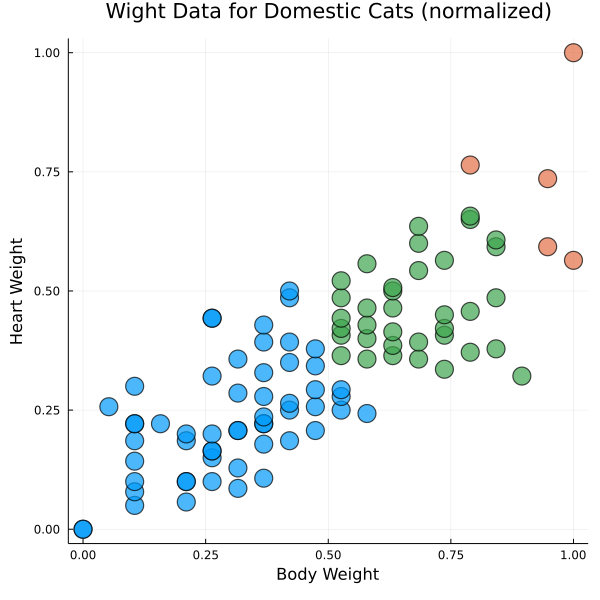

In [107]:
# plotting results
cats_kmeans = scatter(f1_n, f2_n,
    xl = "Body Weight",
    yl = "Heart Weight",
    title = "Wight Data for Domestic Cats (normalized)",
    group = a,
    ms = 10,
    alpha = 0.7,
    legend = false)

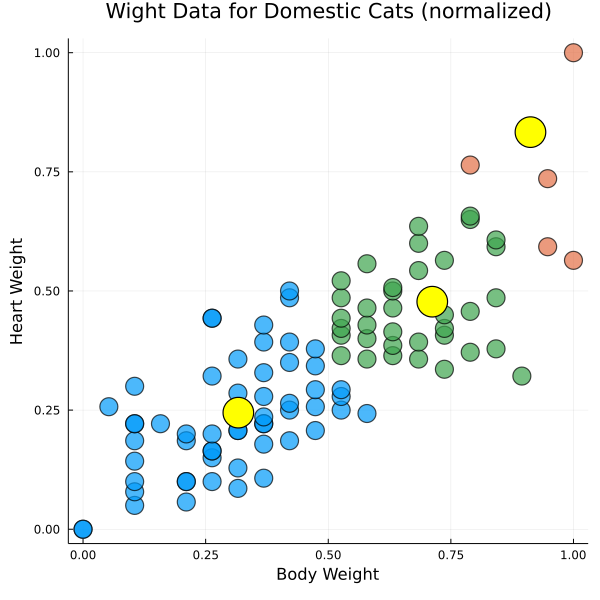

In [109]:
# Now we eant to see where are the centroids
scatter!(mu[1,:], mu[2,:],
c = :yellow,
ms = 17,
alpha = 5,
legend = false)